In [12]:
import nltk
# nltk.download()



In [13]:

from nltk.corpus import names
print(names.words()[:10])

print(len(names.words()))



['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']
7944


In [14]:


from nltk.tokenize import word_tokenize
sent = '''I am reading a book.
          It is Python Machine Learning By Example,
          4th edition.'''

print(word_tokenize(sent))



['I', 'am', 'reading', 'a', 'book', '.', 'It', 'is', 'Python', 'Machine', 'Learning', 'By', 'Example', ',', '4th', 'edition', '.']


In [15]:
sent2 = 'I have been to U.K. and U.S.A.'
print(word_tokenize(sent2))



['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A', '.']


In [74]:
import spacy
nlp = spacy.load('en_core_web_sm')
tokens2 = nlp(sent2)

print([token.text for token in tokens2])



OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [75]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(sent))



['I am reading a book.', 'It is Python Machine Learning By Example,\n          4th edition.']


In [76]:
import nltk
tokens = word_tokenize(sent)
print(nltk.pos_tag(tokens))



[('I', 'PRP'), ('am', 'VBP'), ('reading', 'VBG'), ('a', 'DT'), ('book', 'NN'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('Python', 'NNP'), ('Machine', 'NNP'), ('Learning', 'NNP'), ('By', 'IN'), ('Example', 'NNP'), (',', ','), ('4th', 'CD'), ('edition', 'NN'), ('.', '.')]


In [77]:
nltk.help.upenn_tagset('PRP')
nltk.help.upenn_tagset('VBP')



PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [78]:
print([(token.text, token.pos_) for token in tokens2])



NameError: name 'tokens2' is not defined

In [79]:
tokens3 = nlp('The book written by Hayden Liu in 2024 was sold at $30 in America')
print([(token_ent.text, token_ent.label_) for token_ent in tokens3.ents])



NameError: name 'nlp' is not defined

### Stemming and Lemmatization

In [19]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()



In [20]:
porter_stemmer.stem('machines')


'machin'

In [21]:
porter_stemmer.stem('learning')

'learn'

In [22]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [23]:
lemmatizer.lemmatize('machines')


'machine'

In [24]:
lemmatizer.lemmatize('learning')


'learning'

### Geting the Newsgroups Data

In [25]:
from sklearn.datasets import fetch_20newsgroups

In [26]:
groups = fetch_20newsgroups()

In [27]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [28]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [29]:
groups['target']


array([7, 4, 4, ..., 3, 1, 8])

In [30]:
import numpy as np
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

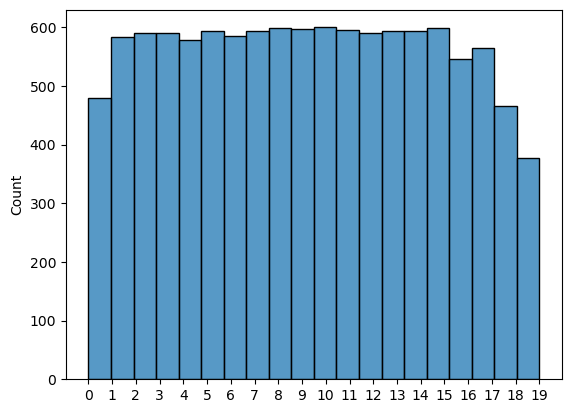

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(groups.target, bins=20)
plt.xticks(range(0, 20, 1))
plt.show()

In [32]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [33]:
groups.target[0]

7

In [34]:
groups.target_names[groups.target[0]]

'rec.autos'

### Features for Text Data

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
count_vector = CountVectorizer(max_features=500)
data_count = count_vector.fit_transform(groups.data)

In [42]:
data_count

<11314x500 sparse matrix of type '<class 'numpy.int64'>'
	with 798221 stored elements in Compressed Sparse Row format>

In [43]:
data_count[0]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 53 stored elements in Compressed Sparse Row format>

In [44]:
data_count.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
print(count_vector.get_feature_names_out())

['00' '000' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17' '18' '19'
 '1993' '20' '21' '22' '23' '24' '25' '26' '27' '30' '32' '34' '40' '50'
 '93' 'a86' 'able' 'about' 'above' 'ac' 'access' 'actually' 'address'
 'after' 'again' 'against' 'ago' 'all' 'already' 'also' 'always' 'am'
 'american' 'an' 'and' 'andrew' 'another' 'answer' 'any' 'anyone'
 'anything' 'apple' 'apr' 'april' 'are' 'armenian' 'around' 'article' 'as'
 'ask' 'at' 'au' 'available' 'away' 'ax' 'b8f' 'back' 'bad' 'based' 'be'
 'because' 'been' 'before' 'being' 'believe' 'best' 'better' 'between'
 'bible' 'big' 'bill' 'bit' 'book' 'both' 'but' 'buy' 'by' 'ca' 'call'
 'called' 'came' 'can' 'canada' 'cannot' 'car' 'card' 'case' 'cc' 'center'
 'change' 'children' 'chip' 'christian' 'clipper' 'co' 'code' 'color'
 'com' 'come' 'computer' 'control' 'could' 'course' 'cs' 'current' 'data'
 'david' 'day' 'days' 'de' 'department' 'did' 'didn' 'different' 'disk'
 'distribution' 'do' 'does' 'doesn' 'doing' 'don' 'done' 'dos' 'do

## Text Processing 

In [46]:
data_cleaned = []
for doc in groups.data:
    doc_cleaned = ' '.join(word for word in doc.split() if word.isalpha())
    data_cleaned.append(doc_cleaned)



### Dropping stop_words

In [47]:
from sklearn.feature_extraction import _stop_words
print(_stop_words.ENGLISH_STOP_WORDS)

frozenset({'that', 'seemed', 'go', 'back', 'detail', 'either', 'anyway', 'mine', 'find', 'thereupon', 'five', 'move', 'still', 'least', 'forty', 'after', 'however', 'herself', 'than', 'in', 'would', 'yourself', 'thus', 'call', 'somehow', 'anyhow', 'along', 'across', 'namely', 'third', 'as', 'thick', 'has', 'because', 'whereupon', 'mostly', 'three', 'eg', 'by', 'the', 'hereby', 'nothing', 'see', 'whenever', 'meanwhile', 'yourselves', 'at', 'eight', 'a', 'many', 'thence', 'beyond', 'indeed', 'off', 'perhaps', 'alone', 'much', 'name', 'done', 'else', 'fifteen', 'i', 'before', 'due', 'amoungst', 'everything', 'which', 'ours', 'part', 'were', 'somewhere', 'nevertheless', 'between', 'those', 'it', 'whom', 'own', 'found', 'whence', 'four', 'whereby', 'will', 'towards', 'wherever', 'but', 'my', 'once', 'whether', 'beforehand', 'until', 'ie', 'throughout', 'yours', 'too', 'elsewhere', 'also', 'within', 'with', 'if', 'us', 'someone', 'although', 'twenty', 'them', 'put', 'anything', 'fire', 'nor'

In [48]:
count_vector = CountVectorizer(stop_words="english",max_features=500)



### Reducing inflectional and derivational forms of words

In [49]:
all_names = set(names.words())

In [54]:
def get_cleaned_data(groups, lemmatizer, remove_words):
    data_cleaned = []

    for doc in groups.data:
        doc = doc.lower()
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in remove_words)
        data_cleaned.append(doc_cleaned)
        
    return data_cleaned



In [55]:
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

data_cleaned = get_cleaned_data(groups, lemmatizer, all_names)

data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)

In [56]:
sum(len(set(doc.split())) for doc in data_cleaned)



1169766

In [57]:
print(count_vector_sw.get_feature_names_out())

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'april' 'arab' 'area'
 'argument' 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack'
 'attempt' 'available' 'away' 'bad' 'based' 'belief' 'believe' 'best'
 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box'
 'build' 'bus' 'buy' 'ca' 'california' 'called' 'came' 'canada' 'car'
 'card' 'care' 'carry' 'case' 'cause' 'center' 'certain' 'certainly'
 'chance' 'change' 'check' 'child' 'chip' 'christian' 'church' 'city'
 'claim' 'clear' 'clinton' 'clipper' 'code' 'college' 'color' 'come'
 'coming' 'command' 'comment' 'common' 'communication' 'company'
 'computer' 'consider' 'considered' 'contact' 'control' 'copy' 'cost'
 'country' 'couple' 'course' 'create' 'crime' 'current' 'cut' 'data'
 'david' 'day' 'db' 'deal' 'death' 'department' 'device' 'did'
 'difference' 'different' 'di

## Visualizing the Newsgroups data with t-SNE / t-SNE for dimensionality reduction

In [63]:
from sklearn.manifold import TSNE

In [64]:
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']

groups_3 = fetch_20newsgroups(categories=categories_3)



In [65]:
data_cleaned = get_cleaned_data(groups_3, lemmatizer, all_names)
 
data_cleaned_count_3 = count_vector_sw.fit_transform(data_cleaned)

In [66]:
tsne_model = TSNE(n_components=2,  perplexity=40, random_state=42, learning_rate=500)

data_tsne = tsne_model.fit_transform(data_cleaned_count_3.toarray())

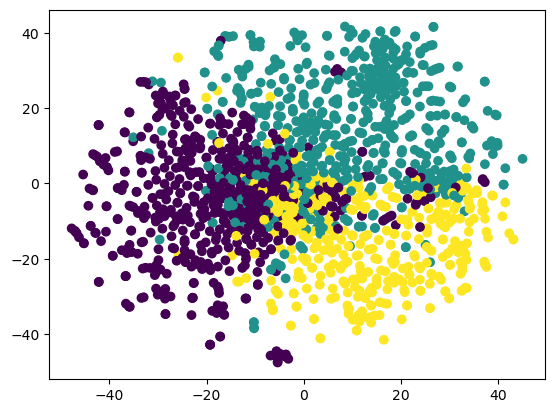

In [68]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target)
plt.show()

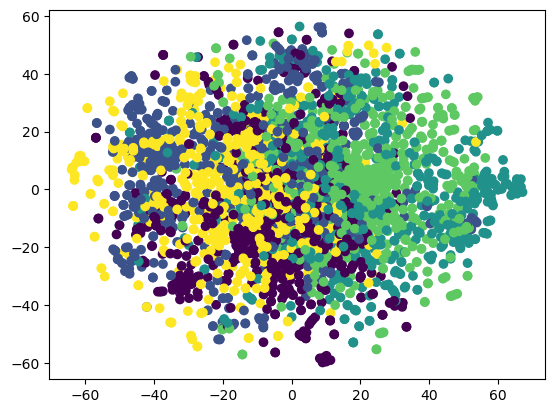

In [69]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                'comp.windows.x']
groups_5 = fetch_20newsgroups(categories=categories_5)

data_cleaned = get_cleaned_data(groups_5, lemmatizer, all_names)
 
data_cleaned_count_5 = count_vector_sw.fit_transform(data_cleaned)

data_tsne = tsne_model.fit_transform(data_cleaned_count_5.toarray())

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_5.target)

plt.show()

### Building Embedding Models using shallow neural networks 
#### utilizing pre-trained embedding models

In [70]:
import gensim.downloader as api
model = api.load("glove-twitter-25")


[===========---------------------------------------] 22.4% 23.4/104.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.5% 78.0/104.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [71]:
vector = model['computer']
print('Word computer is embedded into:\n', vector)

Word computer is embedded into:
 [ 0.64005  -0.019514  0.70148  -0.66123   1.1723   -0.58859   0.25917
 -0.81541   1.1708    1.1413   -0.15405  -0.11369  -3.8414   -0.87233
  0.47489   1.1541    0.97678   1.1107   -0.14572  -0.52013  -0.52234
 -0.92349   0.34651   0.061939 -0.57375 ]


In [72]:
similar_words = model.most_similar("computer")
print('Top ten words most contextually relevant to computer:\n', 
           similar_words)



Top ten words most contextually relevant to computer:
 [('camera', 0.907833456993103), ('cell', 0.891890287399292), ('server', 0.874466598033905), ('device', 0.8693524599075317), ('wifi', 0.8631256818771362), ('screen', 0.8621907234191895), ('app', 0.8615544438362122), ('case', 0.8587923049926758), ('remote', 0.8583616614341736), ('file', 0.8575270175933838)]


In [73]:
doc_sample = ['i', 'love', 'reading', 'python', 'machine', 
                 'learning', 'by', 'example']
doc_vector = np.mean([model[word] for word in doc_sample], axis=0)
print('The document sample is embedded into:\n', doc_vector)



The document sample is embedded into:
 [-0.17100249  0.1388764   0.10616798  0.200275    0.1159925  -0.1515975
  1.1621187  -0.4241785   0.2912     -0.28199488 -0.31453252  0.43692702
 -3.95395    -0.35544625  0.073975    0.1408525   0.20736426  0.17444688
  0.10602863 -0.04121475 -0.34942    -0.2736689  -0.47526264 -0.11842456
 -0.16284864]
